## Week 3, explore
* Read Amazon.csv
* Get to know the data


In [1]:
# imports and specifications
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### read Amazon.csv

In [2]:
amazon = pd.read_csv('/Users/Aaron_hill/Dropbox/data/Amazon.csv')

### get to know the data

In [3]:
print("amazon is:", type(amazon))
print("amazon has", amazon.shape[0], "rows and", amazon.shape[1], "columns", "\n")
print("the data types for each of the columns in amazon:")
print(amazon.dtypes, "\n")
print("the first 10 rows in amazon:")
print(amazon.head(10))

amazon is: <class 'pandas.core.frame.DataFrame'>
amazon has 455000 rows and 13 columns 

the data types for each of the columns in amazon:
Unnamed: 0                  int64
Id                          int64
ProductId                  object
UserId                     object
ProfileName                object
HelpfulnessNumerator        int64
HelpfulnessDenominator      int64
Score                       int64
Time                        int64
Summary                    object
Text                       object
helpScore                 float64
helpful                      bool
dtype: object 

the first 10 rows in amazon:
   Unnamed: 0      Id   ProductId          UserId       ProfileName  \
0      138806  138807  B000E63LME  A1CQGW1AOD0LF2  Alena K. "Alena"   
1      469680  469681  B004ZIH4KM  A37S7U1OX2MCWI        Becky Cole   
2      238202  238203  B003ZXE9QA  A2OM6G73E64EQ9              jeff   
3      485307  485308  B001RVFERK  A25W349EE97NBK          Tangent4   
4      375283  3752

### What is the relationship between the "Helpful Denominator" and the number of stars given?

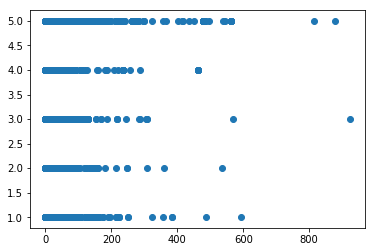

In [4]:
plt.scatter(amazon["HelpfulnessDenominator"], amazon["Score"])

### Let's get to know "HelpfulnessDenominator"

In [5]:
amazon["HelpfulnessDenominator"].count()

455000

In [6]:
amazon["HelpfulnessDenominator"].mean()

2.2188945054945055

In [7]:
amazon['helpfulness_denom_nonzero'] = amazon['HelpfulnessDenominator'] > 0
amazon['helpfulness_denom_nonzero'].sum()

238678

### create a subset of Amazon that only includes reviews where someone marked whether it's helpful

In [8]:
a2 = amazon.loc[amazon["helpfulness_denom_nonzero"]==True]
a2.shape

(238678, 14)

### Create a feature that contains the quantity of the number of words in a review (word count)

In [9]:
amazon['word_count'] = amazon['Text'].str.split(' ').str.len()
print(amazon[["Text", "word_count"]].head())

                                                Text  word_count
0  I was looking forward to try cranberry apple f...          32
1  TY for everything.  The seeds arrived quickly,...          27
2  I've finally found the best cereal in the worl...         124
3  I originally bought these chips because I'd he...         179
4  Really excellent tea, flowers are visible in t...          39


### What is the datatype of `amazon`?

In [10]:
print(type(amazon))
print(type(amazon.values))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


### What are the datatypes of the features in `amazon`?

In [11]:
# http://www.datacarpentry.org/python-ecology-lesson/03-data-types-and-format/
print(amazon.dtypes)

Unnamed: 0                     int64
Id                             int64
ProductId                     object
UserId                        object
ProfileName                   object
HelpfulnessNumerator           int64
HelpfulnessDenominator         int64
Score                          int64
Time                           int64
Summary                       object
Text                          object
helpScore                    float64
helpful                         bool
helpfulness_denom_nonzero       bool
word_count                     int64
dtype: object


### Look at the text of 10 random reviews

In [12]:
this_sample = amazon['Text'].sample(n=10)
for sample in this_sample: 
    print(sample, '\n')

Received in good condition and in a timely manner.  Great for relaxing the heart. 

My husband and I love these!  We have them every day with our coffee and so much more economical to buy a case at a time from Amazon rather than individually at the grocery store.  Not only are they "delish" but at 100 calories per cookie, it's a guilty pleasure! 

I recently purchased a case of Zevia.  I was anxious to try out this product.  It arrived today, much to my delight.  After drinking just a half of a can, I came down with a terrible headache.  I couldn't believe it.  The culprit...ERYTHRITOL, a sugar alcohol, the second ingredient in the product; not STEVIA, the fifth ingredient. Also, the product is purported to have -0- calories.  Erythritol contains 2.6 calories per gram.  There are 12 grams of erythritol in each can.  Most erythritol is made from fermenting GMO corn.  How healthy is that? This beverage is VERY expensive and would be well worth it if it were truly an all natural<br />drin